##### C&S10.5 Shooting Method for 2-point Boundary value problems-Diffusion reaction in catalyst

$$\frac{d}{dr}\left(N_Ar^2\right)=-k''aC_Ar^2$$
$$N_A=-D_e\frac{dC_A}{dr}$$
$$\eta=\frac{\text{rate observed}}{\text{rate at }C_{A_s}}=\frac{\int_0^R k''aC_A4\pi r^2 dr}{k''aC_{A_s}\frac{4}{3} \pi R^3}$$
This gives 3 ODE's
$$\frac{d}{dr}\left(N_Ar^2\right)=-k''aC_Ar^2$$
$$\frac{dC_A}{dr}=\frac{N_A}{-D_e}$$
$$\frac{d\eta}{dr}=\frac{3C_A r^2}{C_{A_s}R^3}$$

In this problem we have split boundary conditions.  At $r=0$ we don't know $C_A=?$ but we know that $N_Ar^2=0$.  At the other boundary of $r=R$ we know $C_A=C_{A_s}$ but don't know  $N_Ar^2$.  So we need to guess $C_A|_{r=0}$ and then check at $r=R$ that $C_A=C_{A_s}=0.2 \frac{mol}{cm^3}$.  For the $\eta$ integral we will start summing at $r=0$ and $\eta=0$ and the last value at $r=R$ will be the value of $\eta$ at the given $\phi=R\sqrt{\frac{k''aC_{A-s}^{n-1}}{D_e}}$.

In the secant method we will make 2 guesses of the value of $C_A$ at $r=0$.  Then we will integrate and check to see if $C_A=C_{A_s}=0.2 \frac{mol}{cm^3}$.  The error will be $err=C_A - 0.2$.  At $r=R$ the value of $err$ should be zero. 
$$err(y_{0_{k}})\equiv \left. C_A \right|_{r=R}-0.2$$ 
Remember from C&S6.4a that the <b>secant method </b>is just a <b>linear interpolation between pairs of points </b>.  
In this case the pairs of points are the $(y_{0_{k-1}},err( y_{0_{k-1}} )$ or $(y_{0_{k}}, err( y_{0_k} ))$

$$y_{0_{k+1}}=y_{0_k}-err(y_{0_k})$$
$$y_{0_{k+1}}=y_{0_k}-err(y_{0_k})\frac{ y_{0_k}-y_{0_{k-1}} } {err(y_{0_k})-err(y_{0_{k-1}})}$$
Two initial values or guesses of y_0 are needed.

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import math
import matplotlib.pyplot as plt

In [2]:
 def ODEfun(r,Yfuncvec):
    CA = Yfuncvec[0] 
    NArr = Yfuncvec[1] 
    eta = Yfuncvec[2]
    
    CAs=0.2
    R=0.5
    De=0.1
    kppa=6.4
   
    phi=R*(kppa/De)**0.5
    
    etacalc=(3/phi**2)*(phi*(1/np.tanh(phi))-1)
    
    if (r > 0) :
        NA = NArr / r**2
    else:
        NA = 0
      
    dCAdr=NA/(-De)
    dNArrdr=-kppa*CA*r**2
    detadr=3*CA*r**2/(CAs*R**3)
    
    dYfuncvecdz = [dCAdr, dNArrdr, detadr ] 
    return dYfuncvecdz

In [3]:
r=0
NArr=2
if (r > 0) :
    NA = NArr / r**2
else:
    NA = 0

print(NA)

0


In [4]:
#test of function ODEfun with the addition of Qx
tspan = (0,0.5) # Range for the independent variable 
y0 = [ 0.2, 0, 0] # Initial values for the dependent variables
#we will get CA=.029315
sol=ODEfun(tspan[1],y0)
print (sol)
print(y0)

[-0.0, -0.32000000000000006, 6.000000000000001]
[0.2, 0, 0]


In [5]:
#input the first 2 guesses for the secant method
print('           y     dy/dt         ')
sol=ODEfun(tspan[0],y0) 
print('    {:7.2f}    {:7.2f}\n'.format(y0[0],sol[0]))
sol=solve_ivp(ODEfun,tspan,y0)#solve the ODE 
print(sol)

           y     dy/dt         
       0.20      -0.00

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 62
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00000000e-04, 1.10000000e-03, 1.11000000e-02,
       5.17321179e-02, 9.91473460e-02, 1.64618095e-01, 2.48546913e-01,
       3.50161996e-01, 4.67370357e-01, 5.00000000e-01])
 t_events: None
        y: array([[ 2.00000000e-01,  2.00000021e-01,  2.00002581e-01,
         2.00262963e-01,  2.05760336e-01,  2.21643973e-01,
         2.63042838e-01,  3.60444829e-01,  5.85660404e-01,
         1.12419973e+00,  1.36462670e+00],
       [ 0.00000000e+00, -4.26666694e-13, -5.67897740e-10,
        -5.83983877e-07, -6.00914806e-05, -4.42617578e-04,
        -2.25471503e-03, -9.53586636e-03, -3.73700867e-02,
        -1.44159573e-01, -2.04899720e-01],
       [ 0.00000000e+00,  8.00000051e-12,  1.06480826e-08,
         1.09496977e-05,  1.12671526e-03, 

In [37]:
#Test Cell
CAs=0.2
#initialize arrays
yini=np.zeros(21)
f=np.zeros(21)
#input the first 2 guesses of CA at r=0 for the secant method
yini[0]=.1
yini[1]=.05
#CA is the first element of the y0 array
y0 = [yini[0],0,0] # Initial values for the dependent variables
print('   Point. No.    y0            f(0)     CAsurface')
k=0 #python starts arrays at 0
sol=solve_ivp(ODEfun,tspan,y0,rtol=1e-6)
#This is the condition that must be zero or at least less than 1E-6
#The conditon below using the -1 is looking for the last value of CA at r=R
f[k] = sol.y[0,-1] - CAs
print('   {:d}          {:8.3f}     {:8.4f}     {:6.4f}'.format(k+1, yini[k], f[k], sol.y[0,-1]))
k=1
y0 = [yini[k],0,0]
sol=solve_ivp(ODEfun,tspan,y0,rtol=1e-6)#solve the ODE with second y0
f[k] = sol.y[0,-1]-CAs

print('   {:d}          {:8.3f}     {:8.4f}     {:6.4f}'.format(k+1, yini[k], f[k], sol.y[0,-1]))
err=np.abs(f[k])

while (err>1e-6 and k<20): #multiple iterations to get err<1e-6
    yini[k+1]= yini[k]-f[k]*(yini[k]-yini[k-1])/(f[k]-f[k-1])
    y0 = [yini[k+1],0,0]
    sol=solve_ivp(ODEfun,tspan,y0,rtol=1e-6)

    f[k+1] = sol.y[0,-1]-CAs
    
    print('   {:d}          {:8.8f}   {:11.4e}  {:6.4f}'.format(k+2, yini[k+1], f[k+1], sol.y[0,-1]))
    err=np.abs(f[k+1])
    k=k+1


   Point. No.    y0            f(0)     CAsurface
   1             0.100       0.4823     0.6823
   2             0.050       0.1411     0.3411
   3          0.02931422   -1.4594e-07  0.2000


In [34]:
print('at r=0 CA={:5.4f} mol/cm^3'.format(sol.y[0,0]) )

at r=0 CA=0.0293 mol/cm^3


In [51]:
#printing of the results
CAs=0.2
R=0.5
De=0.1
kppa=6.4

phi=R*(kppa/De)**0.5

etacalc=(3/phi**2)*(phi*(1/np.tanh(phi))-1)
print(phi,sol.y[2,-1],etacalc)

4.0 0.5631190080825816 0.5630033628012618


In [60]:
numrows=100
teval=np.linspace(tspan[0],tspan[1],numrows)
sol=solve_ivp(ODEfun,tspan,y0,t_eval=teval)
print('Solution ')
print('    r            CA       CAanal        NAr^2  ')
print('  (m)       (kmol/$m^3$) (kmol/$m^3$)   (kmol/s)                                         ')
CAanal=np.zeros(numrows)

row=0
for row in range(numrows):
    
    CAanal[row]= 0.0293 if sol.t[row] <1e-7 else 0.2*R/sol.t[row]*np.sinh(phi*sol.t[row]/R)/np.sinh(phi)
    
    print('{:4.4e} {:10.4f} {:10.4f}    {:10.4e} '.format(sol.t[row],
                    sol.y[0][row],CAanal[row],sol.y[1][row]))


Solution 
    r            CA       CAanal        NAr^2  
  (m)       (kmol/$m^3$) (kmol/$m^3$)   (kmol/s)                                         
0.0000e+00     0.0293     0.0293    0.0000e+00 
5.0505e-03     0.0293     0.0293    -8.0563e-09 
1.0101e-02     0.0293     0.0293    -6.4493e-08 
1.5152e-02     0.0294     0.0294    -2.1746e-07 
2.0202e-02     0.0294     0.0294    -5.1498e-07 
2.5253e-02     0.0295     0.0295    -1.0066e-06 
3.0303e-02     0.0296     0.0296    -1.7429e-06 
3.5354e-02     0.0297     0.0297    -2.7754e-06 
4.0404e-02     0.0298     0.0298    -4.1565e-06 
4.5455e-02     0.0300     0.0300    -5.9397e-06 
5.0505e-02     0.0301     0.0301    -8.1795e-06 
5.5556e-02     0.0303     0.0303    -1.0931e-05 
6.0606e-02     0.0305     0.0305    -1.4251e-05 
6.5657e-02     0.0307     0.0307    -1.8197e-05 
7.0707e-02     0.0309     0.0309    -2.2827e-05 
7.5758e-02     0.0311     0.0311    -2.8208e-05 
8.0808e-02     0.0314     0.0314    -3.4405e-05 
8.5859e-02     0.031

Text(0, 0.5, 'Concentration (mol/$cm^3$)')

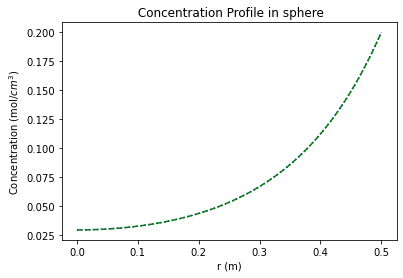

In [64]:
#plot the data

plt.plot(sol.t,sol.y[0],':b')
plt.plot(sol.t,CAanal,'g', linestyle='--')
plt.title(' Concentration Profile in sphere')
plt.xlabel('r (m)')
plt.ylabel('Concentration (mol/$cm^3$)')

